## 목표
- 버섯의 특징을 활용해 독/식용 버섯을 분류
- DecisionTree 시각화 & 과대적합 속성 제어

In [74]:
# 1. 데이터를 로딩
# 2. 전체컬러므 행 숫자파악
# 3. 결측치 파악
# 4. 문제와 답 분리
# 5. 기술통계 -> 범주형 데이터
# 6. label의 비율을 확인해보자

In [75]:
import pandas as pd

In [76]:
# mushroom.csv 파일 가져오기
data = pd.read_csv("mushroom.csv")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [77]:
# data의 크기 / 모양 확인
data.shape

(8124, 23)

In [78]:
# data의 결측치/행 개수 확인
data.info

<bound method DataFrame.info of      poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            p         x           s         n       t    p               f   
1            e         x           s         y       t    a               f   
2            e         b           s         w       t    l               f   
3            p         x           y         w       t    p               f   
4            e         x           s         g       f    n               f   
...        ...       ...         ...       ...     ...  ...             ...   
8119         e         k           s         n       f    n               a   
8120         e         x           s         n       f    n               a   
8121         e         f           s         n       f    n               a   
8122         p         k           y         n       f    y               f   
8123         e         x           s         n       f    n               a   

     gill-spacing g

In [79]:
# 문제(X), 답(y) 데이터 분리
# data.loc/iloc[ 행, 열 ]
X = data.loc[:,'cap-shape':]
y = data.loc[:,'poisonous']

In [80]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [81]:
# y(답)에서 p와 e 의 갯수 확인
# e(edible) : 식용 버섯
# p(poisonous) : 독 버섯
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [82]:
# 범주형 데이터 기술 통계 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 인코딩
- 원핫인코딩/ 레이블인코딩

### 레이블 인코딩
- 단순 수치 값으로 mapping 하는 작업
- 숫자 값의 크고 작음에 대한 특성으로 인해 예측성능이 떨어지는 경우가 발생함

In [83]:
# 'habitat' 데이터의 중복을 제거한 값 확인
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [84]:
# mapping : 데이터를 연결한다
habitat_dict = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}
habitat_dict

{'u': 2, 'g': 1, 'm': 3, 'd': 5, 'p': 4, 'w': 6, 'l': 7}

In [85]:
X['habitat'].map(habitat_dict)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

### 레이블인코딩방법2 : LableEncoder

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
items = X['habitat'].unique()

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit() : 레이블 인코더를 학습시킴
encoder.fit(items)

# transform() : 학습된 인코더를 사용하여 데이터를 변환
labels = encoder.transform(items)

print("인코딩 변환값", labels)

인코딩 변환값 [5 1 3 0 4 6 2]


In [88]:
print("인코딩 클래스 : ", encoder.classes_)

인코딩 클래스 :  ['d' 'g' 'l' 'm' 'p' 'u' 'w']


## 원핫 인코딩
- 특성을 세부적으로 나눠서 생각할 수 있음
- 단어를 표현하는 가장 기본적인 표현 방법
- 필요한 공간이 계속 늘어나 저장공간 측면에서는 비효율적인 방법

In [89]:
# get_dummies() 메서드 활용
X_one_hot = pd.get_dummies(X) # 0과 1로만 이루어진 열을 생성
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [90]:
# 원핫 인코딩 이전과 원핫 인코딩 이후 특성비교하기
print("원핫인코딩 이전 특성 : \n", X.columns,"\n")
print("원핫인코딩 이후 특성 : \n", X_one_hot.columns,"\n")

원핫인코딩 이전 특성 : 
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object') 

원핫인코딩 이후 특성 : 
 Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117) 



### 모델링

In [91]:
# train_test_split 불러오기
from sklearn.model_selection import train_test_split

In [92]:
# 문제(X_one_hot)와 답데이터(y)를 훈련셋과 테스트셋 (7:3)으로 나누기
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3)

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
# 결정트리 모델 생성 - tree 에 담아주기
tree = DecisionTreeClassifier(max_depth = 3)

In [95]:
# 훈련 - fit()메서드 활용
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [96]:
# 예측하기 - predict()
pre = tree.predict(X_test)
pre

array(['p', 'e', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [97]:
# 정확도 평가 - metrics / accuracy_score
from sklearn import metrics

In [98]:
metrics.accuracy_score(pre, y_test)

0.985233798195242

## 결정트리 시각화

In [99]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [100]:
list(X_one_hot.columns)

['cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'cap-color_b',
 'cap-color_c',
 'cap-color_e',
 'cap-color_g',
 'cap-color_n',
 'cap-color_p',
 'cap-color_r',
 'cap-color_u',
 'cap-color_w',
 'cap-color_y',
 'bruises_f',
 'bruises_t',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-attachment_a',
 'gill-attachment_f',
 'gill-spacing_c',
 'gill-spacing_w',
 'gill-size_b',
 'gill-size_n',
 'gill-color_b',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-color_w',
 'gill-color_y',
 'stalk-shape_e',
 'stalk-shape_t',
 'stalk-root_?',
 'stalk-root_b',
 'stalk-root_c',
 'stalk-root_e',
 'stalk-root_r',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surfa

In [101]:
plt.rcParams['font.family'] = 'Malgun Gothic'

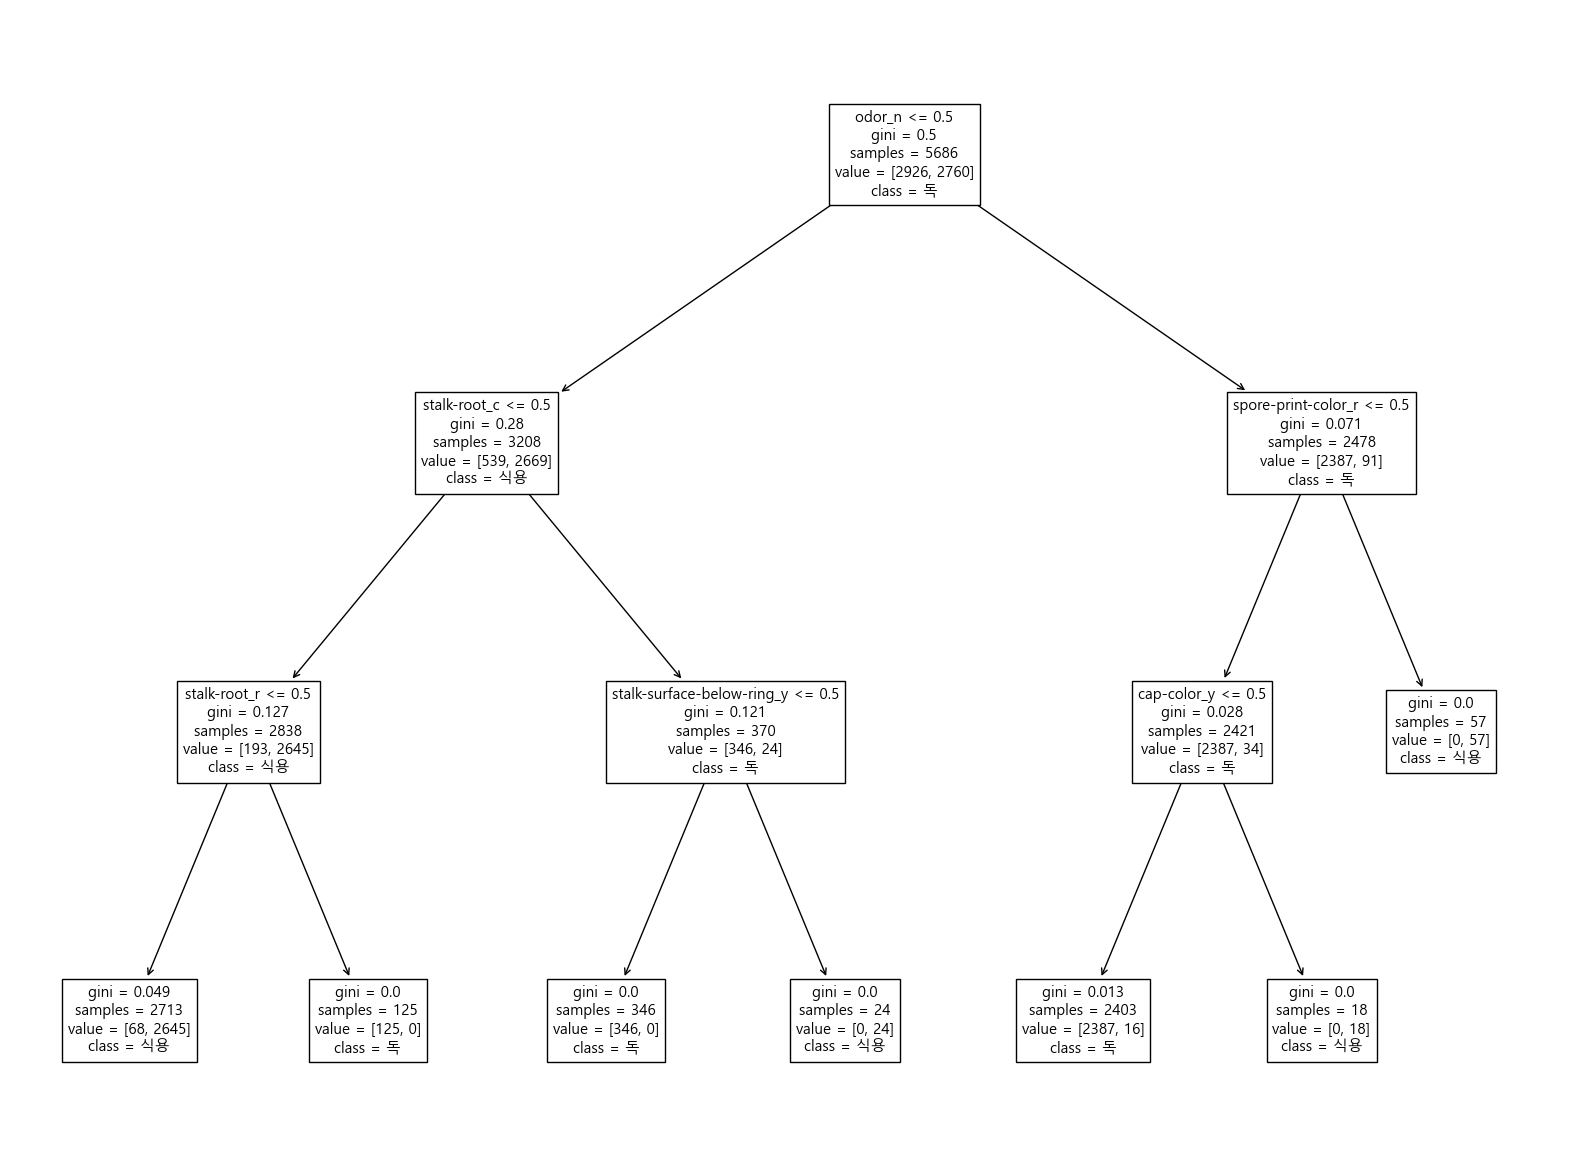

In [102]:
plt.figure(figsize=(20,15))
plot_tree(tree, class_names=['독', '식용'], feature_names=list(X_one_hot.columns))
plt.show()

### 특성 선택
- tree 모델의 특성중요도

In [103]:
fi = tree.feature_importances_
print("특성중요도 : ", fi)

특성중요도 :  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01317469 0.         0.         0.         0.
 0.         0.         0.         0.66078176 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.18393286
 0.         0.08488107 0.         0.         0.         0.
 0.         0.         0.         0.01677248 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.   

In [104]:
# 컬럼이름은 '특성중요도'로 설정 (columns = ['컬럼명'])
# 내림차순 정렬 진행 / sort_values(by='컬럼명'), 

importance_df = pd.DataFrame(fi, index = X_one_hot.columns, columns=['특성중요도'])
importance_df.sort_values(by = '특성중요도', ascending=False)

,특성중요도
odor_n,0.660782
stalk-root_c,0.183933
stalk-root_r,0.084881
spore-print-color_r,0.040457
stalk-surface-below-ring_y,0.016772
...,...
gill-size_n,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000


## 하이퍼파라미터 튜닝

In [105]:
test_list = []
train_list = []

for n in range(1,105,2) :
    # 결정트리 모델 생성
    DecisionTreeClassifier(max_depth = n)
    # 결정트리 모델 훈련 - 모델.fit()
    tree.fit(X_train, y_train)
    # 테스트 성능 예측 - 모델.predict()
    test_pre = tree.predict(X_test)
    # 테스트 성능 평가 - metrics.accuracy_score()
    test_score = metrics.accuracy_score(test_pre, y_test)
    # test_list 성능평가 값 담아주기 - append()
    test_list.append(test_score)
    
#     print("max_depth:", n, "->", test_score)
    
    # 훈련데이터 성능 예측
    train_pre = tree.predict(X_train)
    # 훈련데이터 성능 평가
    train_score = metrics.accuracy_score(train_pre, y_train)
    # train_list 성능평가 값 담아주기
    train_list.append(train_score)

C:\Users\smhrd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


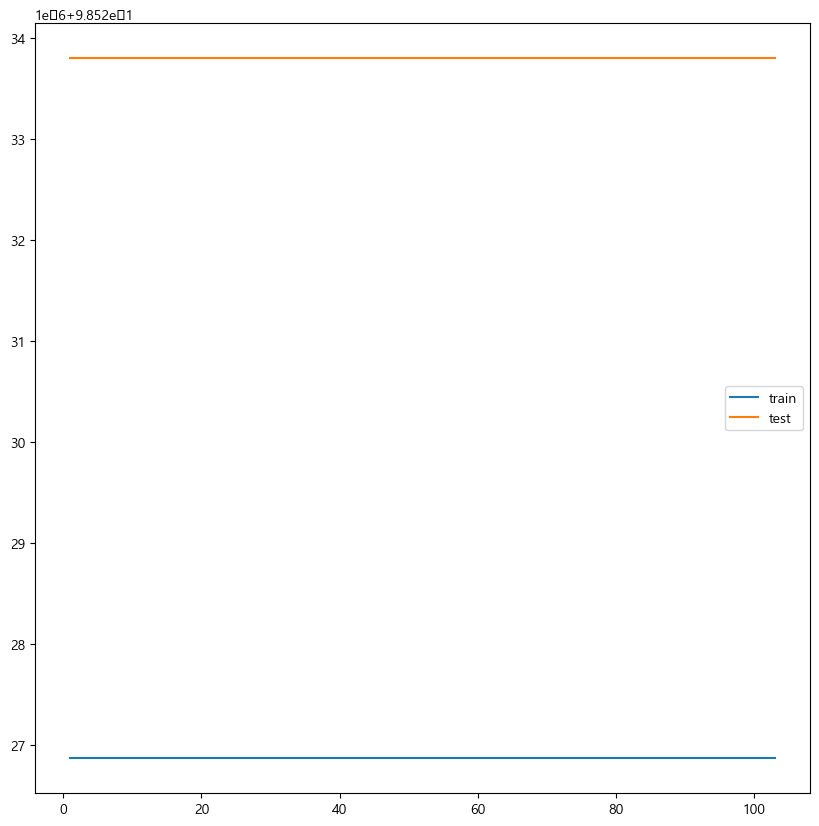

In [115]:
# 훈련데이터와 테스트데이터 성능 평가 비교
plt.figure(figsize=(10,10))

# 훈련데이터 성능값 그래프로 나타내기
plt.plot(range(1,105,2), train_list, label = 'train')

# 테스트데이터 성능값 그래프로 나타내기
plt.plot(range(1,105,2), test_list, label = 'test')

# 범례표시
plt.legend()

# 그래프 보여주기
plt.show()

### K폴드 교차검증
- K개의 데이터 폴드 세트를 만들어서 K번만큼 각 세트에 학습과 검증평가를 반복적으로 수행함

In [110]:
from sklearn.model_selection import KFold
import numpy as np

# 데이터 프레임을 넘파이 배열로 변환
feature = X_one_hot.to_numpy()
label = y.to_numpy()

# 5개의 폴드세트로 분리하는 KFold 객체생성
kfold = KFold(n_splits=5)

# 세트별 정확도를 담을 리스트 생성
cv_accuracy = []

In [111]:
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [114]:
# KFold객체의 split() 호출하면 세트별 학습용, 검증용 행 인덱스를 반환

for train_index, test_index in kfold.split(X_one_hot):
    # 학습용, 검증용 데이터를 추출
    X_train, X_test = feature[train_index], feature[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    tree.fit(X_train, y_train)
    pre = tree.predict(X_test)
    
    # 반복마다 정확도 측정
    accuracy = metrics.accuracy_score(pre, y_test)
    
    cv_accuracy.append(accuracy)

print(cv_accuracy)

[1.0, 0.9969230769230769, 0.9993846153846154, 0.8307692307692308, 0.9901477832512315]


In [122]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(tree, X_train, y_train, cv = 5)
result

array([0.94769231, 0.98153846, 0.99384615, 0.84461538, 0.78307692])

In [121]:
result.mean()

0.9101538461538462